In [1]:
# Check GPU
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
!git clone https://github.com/aj96oneill/BDA.git

fatal: destination path 'BDA' already exists and is not an empty directory.


In [0]:
import sys
sys.path.append('/content/BDA')

----------Everything above this is for Google Coloab----------

## In this assignment, we use photos from Large-scale CelebFaces Attributes (CelebA) Dataset to train convets that can classify photos to male celebrities and female celebrities accurately.
## To make this problem more challenging, we only use 2,000 photos for training, 1,000 photos for validation, and 1,000 photos for testing.
## For the first part of the assignment, following the example of chapter 5.2. Here we train our model using only the 2,000 training photos. Note we need to use data augmentation and dropout to fight overfiting. 
## For the second part, we use a pretrained convet (VGG16) to help with our task. Do the fast feature extraction without augmentation. And do the fine-tuning following chapter 5.3.2. 
## Important information before you start: all the photos are of the size (218, 178), where height = 218, and width = 178.

In [4]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [0]:
import os, shutil

In [0]:
base_dir = '/content/BDA'

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Directory with our training male pictures
train_male_dir = os.path.join(train_dir, 'male')

# Directory with our training female pictures
train_female_dir = os.path.join(train_dir, 'female')

# Directory with our validation male pictures
validation_male_dir = os.path.join(validation_dir, 'male')

# Directory with our validation female pictures
validation_female_dir = os.path.join(validation_dir, 'female')

# Directory with our validation male pictures
test_male_dir = os.path.join(test_dir, 'male')

# Directory with our validation female pictures
test_female_dir = os.path.join(test_dir, 'female')

As a sanity check, let's count how many pictures we have in each training split (train/validation/test):

In [7]:
print('total training male images:', len(os.listdir(train_male_dir)))

total training male images: 825


In [8]:
print('total training female images:', len(os.listdir(train_female_dir)))

total training female images: 1175


In [9]:
print('total validation male images:', len(os.listdir(validation_male_dir)))

total validation male images: 413


In [10]:
print('total validation female images:', len(os.listdir(validation_female_dir)))

total validation female images: 587


In [11]:
print('total test male images:', len(os.listdir(test_male_dir)))

total test male images: 412


In [12]:
print('total test female images:', len(os.listdir(test_female_dir)))

total test female images: 588


In [0]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

# Part 1

building a model with dropout to fight overfitting and then using data augmentation on the training set to improve results and validation loss scores.

In [0]:
model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(218, 178, 3))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 

model.add(layers.Flatten()) 

model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [15]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(218, 178),
    batch_size=32,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(218, 178),
    batch_size=32,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Inspecting Data with Augmentation

In [0]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

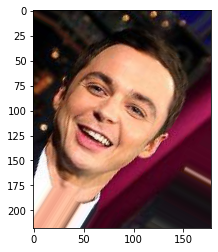

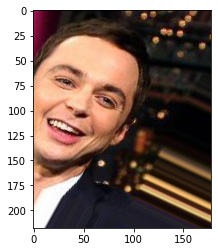

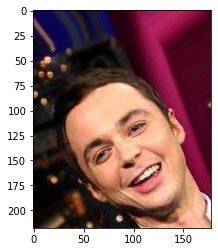

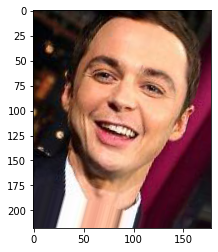

In [17]:
from keras.preprocessing import image

fnames = [os.path.join(train_male_dir, fname) for 
          fname in os.listdir(train_male_dir)]

img_path = fnames[3]
img = image.load_img(img_path, target_size=(218, 178))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0

for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

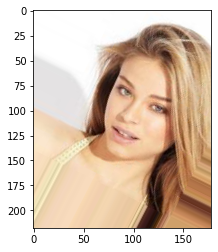

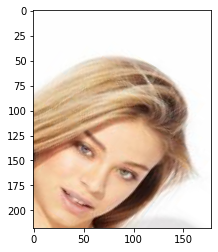

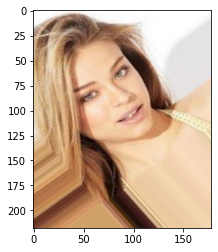

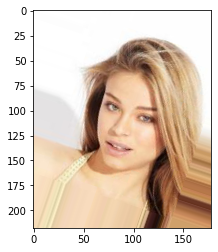

In [18]:
from keras.preprocessing import image

fnames = [os.path.join(train_female_dir, fname) for 
          fname in os.listdir(train_female_dir)]

img_path = fnames[3]
img = image.load_img(img_path, target_size=(218, 178))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0

for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

### Training model to fight overfitting

In [0]:
# history = model.fit_generator(
#     train_generator,
#     steps_per_epoch=100,
#     epochs=100,
#     validation_data=validation_generator,
#     validation_steps=50)

### Viewing results

In [0]:
# acc = history.history['acc']
# val_acc = history.history['val_acc'] 
# loss = history.history['loss'] 
# val_loss = history.history['val_loss']
# epochs = range(1, len(acc) + 1)
# plt.plot(epochs, acc, 'bo', label='Training acc') 
# plt.plot(epochs, val_acc, 'b', label='Validation acc') 
# plt.title('Training and validation accuracy') 
# plt.legend()
# plt.figure()
# plt.plot(epochs, loss, 'bo', label='Training loss') 
# plt.plot(epochs, val_loss, 'b', label='Validation loss') 
# plt.title('Training and validation loss')
# plt.legend()
# plt.show()

# Part 2:

Using a pretrained covnet on our data set and fine 
tuning

In [21]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
    include_top=False,
    input_shape=(218, 178, 3))

58892288/58889256 [==============================] - 3s 0us/step


### Fast Feature extraction without augmentation

In [0]:
import numpy as np

In [0]:
base_dir = '/content/BDA'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 6, 5, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
    directory,
    target_size=(218, 178),
    batch_size=batch_size,
    class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [26]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
train_features = np.reshape(train_features, (2000, 6*5* 512))
validation_features = np.reshape(validation_features, (1000, 6*5* 512))
test_features = np.reshape(test_features, (1000, 6*5* 512))

### Building the model / setting

In [0]:
model = models.Sequential()
model.add(conv_base)

model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
# model.compile(loss='binary_crossentropy',
#     optimizer=optimizers.RMSprop(lr=2e-5),
#     metrics=['acc'])

In [0]:
# history = model.fit_generator(
#     train_generator,
#     steps_per_epoch=100,
#     epochs=30,
#     validation_data=validation_generator,
#     validation_steps=50)

In [0]:
# acc = history.history['acc']
# val_acc = history.history['val_acc']
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(1, len(acc) + 1)
# plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.legend()
# plt.figure()
# plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()
# plt.show()

### Fine Tuning

In [0]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [0]:
model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-5),
    metrics=['acc'])

In [34]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 57s 572ms/step - loss: 0.4498 - acc: 0.7886 - val_loss: 0.4300 - val_acc: 0.8725
Epoch 2/100
100/100 [==============================] - 51s 508ms/step - loss: 0.3127 - acc: 0.8633 - val_loss: 0.3179 - val_acc: 0.8885
Epoch 3/100
100/100 [==============================] - 51s 509ms/step - loss: 0.2656 - acc: 0.8873 - val_loss: 0.2883 - val_acc: 0.9162
Epoch 4/100
100/100 [==============================] - 52s 516ms/step - loss: 0.2357 - acc: 0.9015 - val_loss: 0.1056 - val_acc: 0.9285
Epoch 5/100
100/100 [==============================] - 51s 506ms/step - loss: 0.2113 - acc: 0.9130 - val_loss: 0.1099 - val_acc: 0.9296
Epoch 6/100
100/100 [==============================] - 53s 533ms/step - loss: 0.1917 - acc: 0.9218 - val_loss: 0.2459 - val_acc: 0.9182
Epoch 7/100
100/100 [==============================] - 51s 506ms/step - loss: 0.1764 - acc: 0.9306 - val_loss: 0.1764 - val_acc: 0.9334
Epoch 8/100
100/100 [===========================

### Viewing results after fine tuning

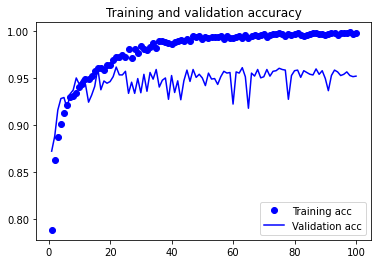

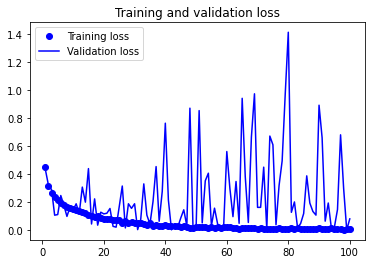

In [35]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

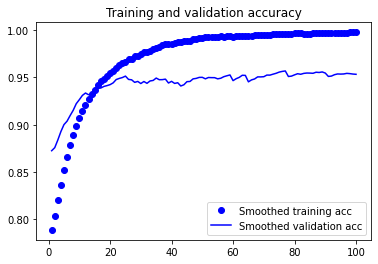

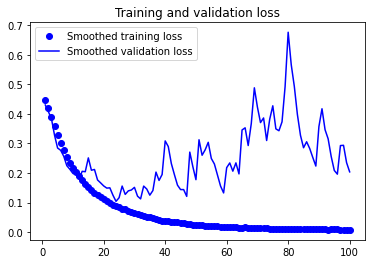

In [36]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
  
plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Testing on test set

In [37]:
true_test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = true_test_datagen.flow_from_directory(
    test_dir,
    target_size=(218, 178),
    batch_size=20,
    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [38]:
model.evaluate(test_generator)

50/50 [==============================] - 11s 213ms/step


[0.43115466833114624, 0.9399999976158142]